In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
import json
import random

In [2]:
def get_columns(path):
    df = pd.read_csv(path)
    return df.columns

In [3]:
def get_attribute(path, attr):
    df = pd.read_csv(path)
    df = df.filter(items=[attr])
    return df

In [4]:
def plot_data(data, xlab, ylab):
    plt.figure(figsize=(10, 5))
    data.plot(kind='bar')
    plt.xlabel(xlab)
    plt.ylabel(ylab)

# Native Language

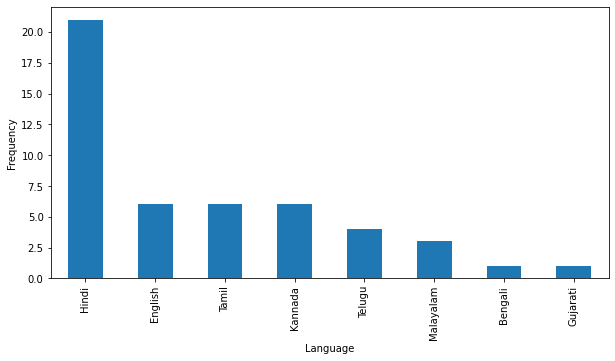

<Figure size 720x360 with 0 Axes>

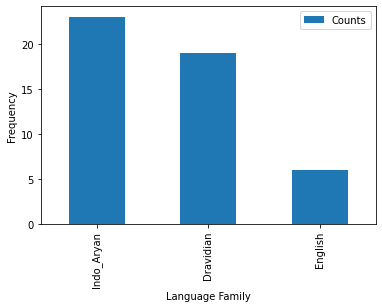

In [5]:
# Get Data
PATH = './demographic-data/indian.csv'
language = get_attribute(PATH, "Native Tongue (母国語)")

# Clean data
language.replace(to_replace= "KANNADA", value = "Kannada", inplace=True )
language.replace(to_replace= "Kannada ", value = "Kannada", inplace=True )
language.replace(to_replace= "Malyalam", value = "Malayalam", inplace=True )
language = language["Native Tongue (母国語)"] 
summary = language.value_counts()

# Plot summary
plot_data(summary, 'Language', 'Frequency')

# Categorize Data
indo_aryan = {'Hindi', 'Bengali', 'Gujarati'}
dravidian = {'Kannada', 'Tamil', 'Telugu', 'Malayalam'}
language_counts = {'Indo_Aryan': 0, 'Dravidian': 0, 'English': summary['English']}
for key, value in summary.iteritems():
    if key in indo_aryan:
        language_counts['Indo_Aryan']+=value
    elif key in dravidian:
        language_counts['Dravidian']+=value

# Plot language family
language_counts = pd.DataFrame(language_counts, index=['Counts']).transpose()
plot_data(language_counts, 'Language Family', 'Frequency')

<Figure size 720x360 with 0 Axes>

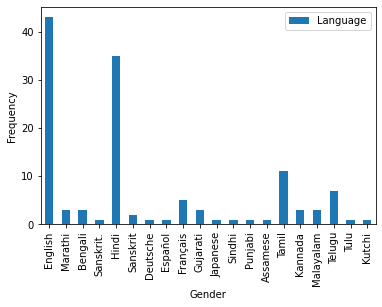

<Figure size 720x360 with 0 Axes>

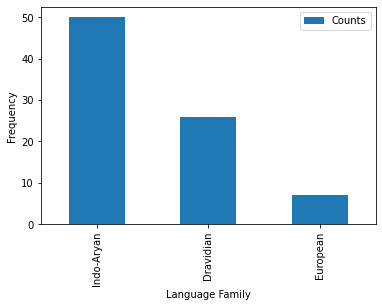

In [65]:
col = get_columns(PATH)[5]
second_language = get_attribute(PATH, col)
second_language.replace(to_replace= "日本語, English", value = "Japanese, English", inplace=True )
second_language.replace(to_replace= "English, Hindi, Telugu, Kannada ; Tulu", value = "English, Hindi, Telugu, Kannada, Tulu", inplace=True )
second_language.replace(to_replace= "English,Telugu, Hindi", value = "English, Telugu, Hindi", inplace=True )
second_language.replace(to_replace= "English, Hindi, Tamil, Gujarati, Kutchi, Malayalam,Marathi", value = "English, Hindi, Tamil, Gujarati, Kutchi, Malayalam, Marathi", inplace=True )
second_language = second_language[col]

lns = {}
for i in second_language:
    l = i.split(', ')
    for j in l:
        if j not in lns:
            lns[j] = 1
        else:
            lns[j] += 1

lns = pd.DataFrame(lns, index=['Language']).transpose()
plot_data(lns, 'Gender', 'Frequency')

indo_aryan = {'Hindi', 'Bengali', 'Gujarati', 'Marathi', 'Sanskrit.', 'Sanskrit', 'Punjabi', 'Sindhi', 'Assamese'}
dravidian = {'Kannada', 'Tamil', 'Telugu', 'Malayalam', 'Tulu', 'Kutchi'}
european = {'Français', 'Español', 'Deutsche'}
language_counts = {'Indo-Aryan': 0, 'Dravidian': 0, 'European': 0}

for key, value in lns['Language'].iteritems():
    if key in indo_aryan:
        language_counts['Indo-Aryan']+=value
    elif key in dravidian:
        language_counts['Dravidian']+=value
    elif key in european:
        language_counts['European']+=value

# Plot language family
language_counts = pd.DataFrame(language_counts, index=['Counts']).transpose()
plot_data(language_counts, 'Language Family', 'Frequency')

# Gender

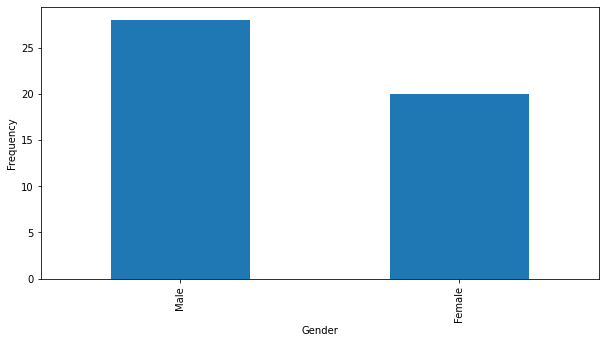

In [6]:
col = get_columns(PATH)[-1]
gender = get_attribute(PATH, col)
gender = gender[col] 
gender.replace(to_replace= "男性", value = "Male", inplace=True )

summary = gender.value_counts()
plot_data(summary, 'Gender', 'Frequency')

In [74]:
df = pd.read_csv(PATH)
df.replace(to_replace= "男性", value = "Male", inplace=True )
gender_details = df.groupby(['Demographic', 'Musicianship'])[get_columns(PATH)[-1]].value_counts()
gender_details
# pd.DataFrame(gender_details).to_csv('./demographic-data/gender_summary.csv', index=False)

Demographic   Musicianship  Gender (性別)
North Indian  Musician      Male           11
                            Female          1
              Non-Musician  Female          7
                            Male            5
South Indian  Musician      Male            7
                            Female          5
              Non-Musician  Female          7
                            Male            5
Name: Gender (性別), dtype: int64

In [8]:
col = get_columns(PATH)
for i in range(len(col)):
    print(i, col[i])

0 Timestamp
1 ID
2 Demographic
3 Musicianship
4 Native Tongue (母国語)
5 Which other languages can you read and/or understand? （他のどの言語を読んだり理解できるか?）
6 How long have you been playing music? ( 音楽経験歴 )
7 What kind of music do you listen to? （好きなジャンル/国教えてください）
8 Name some of your favorite musical artists. (好きなアーティスト名教えてください)
9 How familiar are you with world music? (どれぐらい民俗音楽を聴いたことありますか?)
10 Gender (性別)


# Musicianship

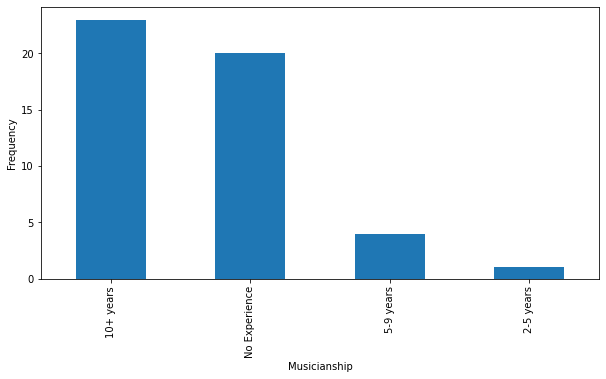

In [9]:
musicianship = get_attribute(PATH, col[6])
musicianship = musicianship[col[6]]

# Clean Data

musicianship.replace(to_replace= "10+ years ( 10年以上)", value = "10+ years", inplace=True)
musicianship.replace(to_replace= "5-9 years ( 2-9 年)", value = "5-9 years", inplace=True)
musicianship.replace(to_replace= "2-5 years ( 2-5 年)", value = "2-5 years", inplace=True)
musicianship.replace(to_replace= "~ 2 years ( ~ 2 年 )", value = "< 2 years", inplace=True)
musicianship.replace(to_replace= "No experience (無し)", value = "No Experience", inplace=True)

summary = musicianship.value_counts()
plot_data(summary, 'Musicianship', 'Frequency')

In [73]:
df.replace(to_replace= "10+ years ( 10年以上)", value = "10+ years", inplace=True)
df.replace(to_replace= "5-9 years ( 2-9 年)", value = "5-9 years", inplace=True)
df.replace(to_replace= "2-5 years ( 2-5 年)", value = "2-5 years", inplace=True)
df.replace(to_replace= "~ 2 years ( ~ 2 年 )", value = "< 2 years", inplace=True)
df.replace(to_replace= "No experience (無し)", value = "No Experience", inplace=True)
musicianship_details = df.groupby(['Demographic', 'Musicianship'])[get_columns(PATH)[6]].value_counts()
pd.DataFrame(musicianship_details).to_csv('./demographic-data/musicianship_summary.csv')

# Musical Preference

In [72]:
col = get_columns(PATH)[7]
preference = get_attribute(PATH, col)
preference_details = df.groupby(['Demographic', 'Musicianship'])[get_columns(PATH)[7]].value_counts()
pd.DataFrame(preference_details).to_csv('./demographic-data/preference_summary.csv')